# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [16]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [12]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02', '03']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [7]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN


In [8]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


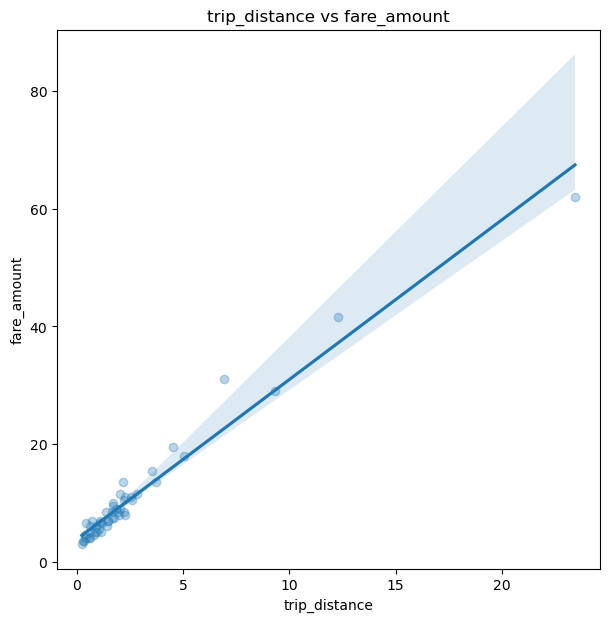

In [9]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

In [10]:
#Makes summary of yellow dataset dataset: 
df_yellow.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,4.666630e+06,4.342112e+06,4.666630e+06,4.342112e+06,4.666630e+06,4.666630e+06,4.666630e+06,4.666630e+06,4.666630e+06,4.666630e+06,4.666630e+06,4.666630e+06,4.666630e+06,4.666630e+06,4.342112e+06,179513.000000
mean,1.721815e+00,1.406879e+00,4.426945e+00,1.031870e+00,1.659491e+02,1.620841e+02,1.182896e+00,1.223617e+01,1.041036e+00,4.931564e-01,1.925650e+00,2.352953e-01,2.969856e-01,1.769714e+01,2.256117e+00,0.000007
std,6.031838e-01,1.045412e+00,4.015094e+02,5.570190e-01,6.788381e+01,7.183621e+01,5.700157e-01,1.848852e+02,1.251030e+00,7.581967e-02,2.411057e+00,1.420263e+00,4.193956e-02,1.849901e+02,7.770550e-01,0.002950
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-6.310000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.802000e+01,-3.000000e-01,-6.348000e+02,-2.500000e+00,0.000000
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.250000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.100000e+01,2.500000e+00,0.000000
50%,2.000000e+00,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.850000e+00,0.000000e+00,3.000000e-01,1.415000e+01,2.500000e+00,0.000000
75%,2.000000e+00,1.000000e+00,3.010000e+00,1.000000e+00,2.360000e+02,2.360000e+02,1.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.750000e+00,0.000000e+00,3.000000e-01,1.955000e+01,2.500000e+00,0.000000
max,6.000000e+00,9.000000e+00,2.631633e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.984664e+05,8.750000e+00,3.300000e+00,1.140440e+03,8.117500e+02,3.000000e-01,3.984692e+05,3.000000e+00,1.250000


In [11]:
#Make summary of green dataset
df_green.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,224917.000000,119227.000000,224917.000000,224917.000000,119227.000000,224917.000000,224917.000000,224917.000000,224917.000000,224917.000000,224917.000000,224917.000000,224917.000000,119227.000000,119227.000000,119227.000000
mean,1.901279,1.141293,110.626351,130.577969,1.217224,26.509460,19.948010,1.185246,0.255302,1.072479,0.538496,0.298170,23.590275,1.405604,1.031184,0.607377
std,0.298288,0.784486,71.300277,77.024647,0.813136,1346.499399,14.593001,1.371524,0.251669,2.017147,1.842541,0.029068,15.941912,0.515591,0.173816,1.140735
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-280.000000,-5.500000,-0.500000,-9.450000,0.000000,-0.300000,-280.300000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,56.000000,65.000000,1.000000,1.310000,9.000000,0.000000,0.000000,0.000000,0.000000,0.300000,12.050000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,76.000000,129.000000,1.000000,2.610000,17.000000,0.500000,0.500000,0.000000,0.000000,0.300000,20.740000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,167.000000,197.000000,1.000000,5.750000,25.430000,2.750000,0.500000,2.000000,0.000000,0.300000,29.430000,2.000000,1.000000,0.000000
max,2.000000,99.000000,265.000000,265.000000,9.000000,244152.010000,600.000000,8.250000,3.550000,110.000000,36.720000,0.300000,600.000000,5.000000,2.000000,2.750000


### Summary
The Yellow taxis conducts a lot more trips, than the green once. Futhermore, it looks like the mean of trip distance is higher for green taxis, then for yellow taxis. 
Futhermore, it is needed to clean up the data as it seems there are errors in the dataset, as seen in the max value of trip distance for both green and yellow taxis, and the max fare amount for yellow taxis. 

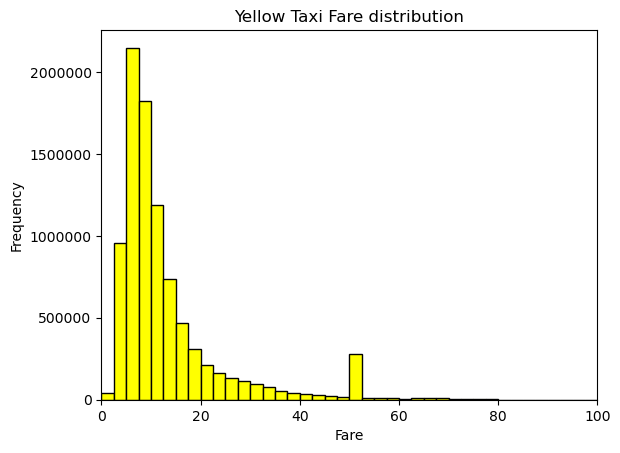

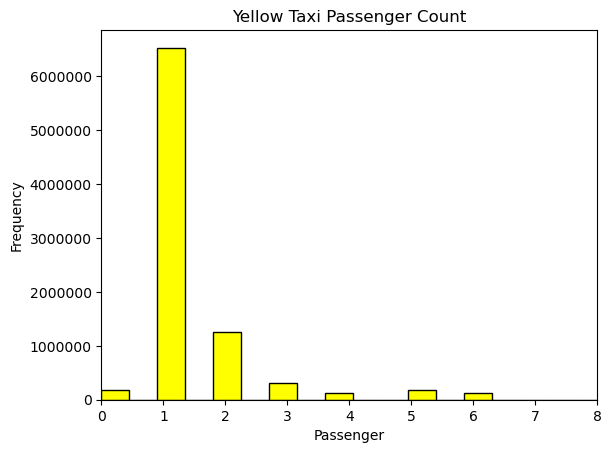

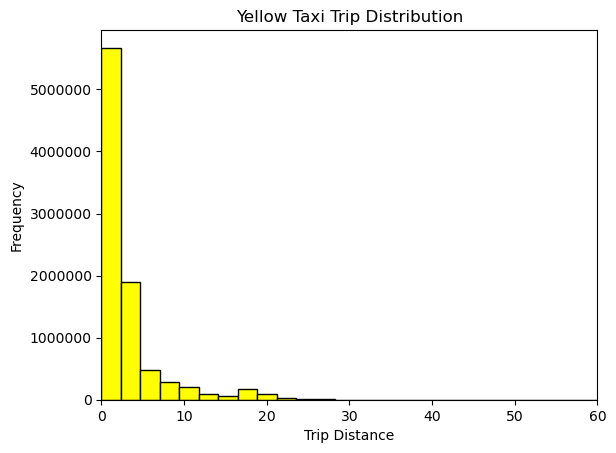

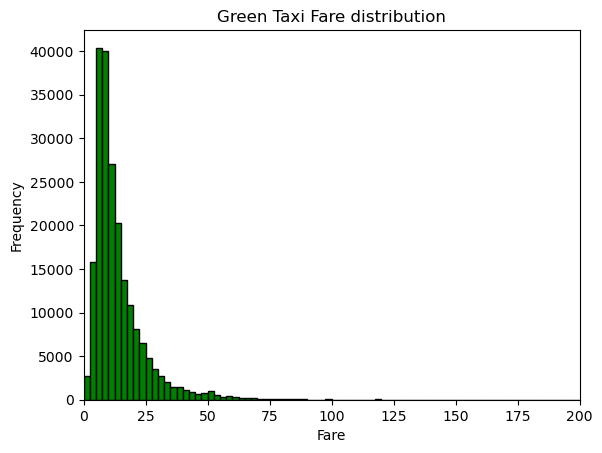

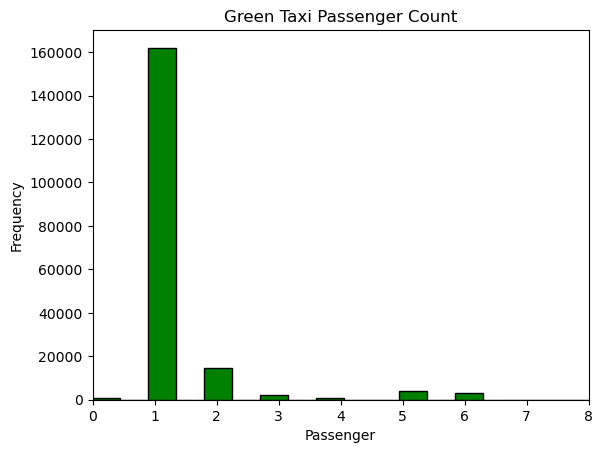

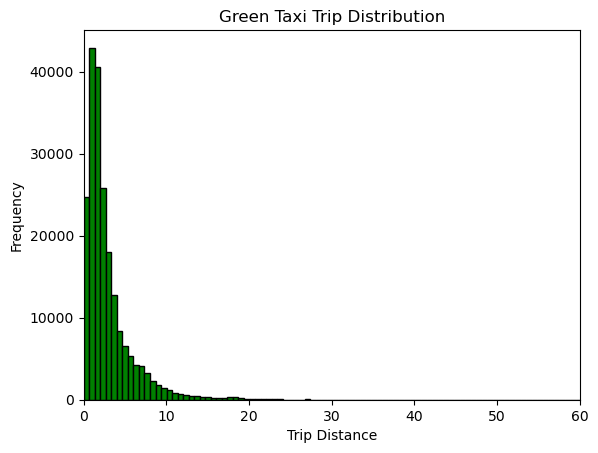

In [2]:
# Write your code
import matplotlib.pyplot as plt
import pandas as pd
from src.histogram import plot_histogram
from src.utils import create_scatterplot


#Yellow Taxis
#Excludes negativ fare amount + over 500 dollars
#Excludes trip distance over 500 miles
df_yellow_filtered = df_yellow[(df_yellow["fare_amount"]<=500) & (df_yellow["fare_amount"]>0) & (df_yellow["trip_distance"] <=500)]

#Plots distribution of fare amount with limit of 100 dollars
plt.subplot(1,1,1)
plot_histogram(df_yellow_filtered["fare_amount"], 
               bins = 200, 
               title = "Yellow Taxi Fare distribution", 
               xmin = 0, 
               xmax = 100, 
               xlabel = "Fare", 
               color = "yellow"
               )

#Plots distrubution of passenger count with limit of 
plt.subplot(1,1,1)
plot_histogram(df_yellow_filtered["passenger_count"], 
               bins = 20, 
               title = "Yellow Taxi Passenger Count", 
               xmin = 0, 
               xmax = 8, 
               xlabel = "Passenger", 
               color = "yellow"
               )

#Plots distrubution of trip distance with max x-value of 50 miles
plt.subplot(1,1,1)
plot_histogram(df_yellow_filtered["trip_distance"], 
               bins = 200, 
               title = "Yellow Taxi Trip Distribution", 
               xmin = 0, 
               xmax = 60, 
               xlabel = "Trip Distance", 
               color = "yellow"
               )



#Green Taxis
df_green_filtered = df_green[(df_green["fare_amount"]<=500) & (df_green["fare_amount"]>0) & (df_green["trip_distance"] <=500)]

plot_histogram(df_green_filtered["fare_amount"], bins = 200, title = "Green Taxi Fare distribution", xmin = 0, xmax = 200, xlabel = "Fare", color = "green")

#Plots distrubution of passenger count with limit of 
plt.subplot(1,1,1)
plot_histogram(df_green_filtered["passenger_count"], 
               bins = 20, 
               title = "Green Taxi Passenger Count", 
               xmin = 0, 
               xmax = 8, 
               xlabel = "Passenger", 
               color = "green"
               )

#Plots distrubution of trip distance with max x-value of 50 miles
plt.subplot(1,1,1)
plot_histogram(df_green_filtered["trip_distance"], 
               bins = 200, 
               title = "Green Taxi Trip Distribution", 
               xmin = 0, 
               xmax = 60, 
               xlabel = "Trip Distance", 
               color = "green"
               )


### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [11]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


In [ ]:
#Install nessecary packages if needed:
!pip install keplergl
!pip install pandas geopandas

In [5]:
# Write your code
import pandas as pd

#Yellow pickup:
df_yellow = pd.merge(
                               df_yellow, 
                               df_zones[['LocationID', 'lat', 'lng']], 
                               left_on='PULocationID', 
                               right_on='LocationID', 
                               how='left'
                               )
df_yellow = df_yellow.rename(columns={'lat': 'lat_PU','lng': 'lng_PU'})
df_yellow = df_yellow.drop("LocationID", axis = 1)


#Yellow dropoff: 
df_yellow = pd.merge(
                               df_yellow, 
                               df_zones[['LocationID', 'lat', 'lng']], 
                               left_on='DOLocationID', 
                               right_on='LocationID', 
                               how='left'
                               )
df_yellow = df_yellow.rename(columns={'lat': 'lat_DO', 'lng': 'lng_DO'})
df_yellow = df_yellow.drop("LocationID", axis = 1)
df_yellow = df_yellow.dropna()


#Green pickup:
df_green = pd.merge(
                               df_green, 
                               df_zones[['LocationID', 'lat', 'lng']], 
                               left_on='PULocationID', 
                               right_on='LocationID', 
                               how='left'
                               )
df_green = df_green.rename(columns={'lat': 'lat_PU','lng': 'lng_PU'})
df_green = df_green.drop("LocationID", axis = 1)


#Green dropoff: 
df_green = pd.merge(
                               df_green, 
                               df_zones[['LocationID', 'lat', 'lng']], 
                               left_on='DOLocationID', 
                               right_on='LocationID', 
                               how='left'
                               )
df_green = df_green.rename(columns={'lat': 'lat_DO', 'lng': 'lng_DO'})
df_green = df_green.drop("LocationID", axis = 1)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,lat_PU,lng_PU,lat_DO,lng_DO
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,3.65,0.0,0.3,21.95,2.5,0.0,40.773906,-73.981352,40.780491,-73.956972
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,4.00,0.0,0.3,13.30,0.0,0.0,40.780491,-73.956972,40.821046,-73.939516
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,1.76,0.0,0.3,10.56,0.0,0.0,40.809570,-73.961815,40.809570,-73.961815
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.00,0.0,0.3,11.80,2.5,0.0,40.728612,-73.998678,40.748397,-73.999940
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,3.00,0.0,0.3,30.30,2.5,0.0,40.748397,-73.999940,40.764425,-73.978367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8956183,1,2022-03-31 23:06:29,2022-03-31 23:28:41,1.0,4.60,1.0,N,113,238,2,...,0.00,0.0,0.3,21.80,2.5,0.0,40.732486,-73.994628,40.791766,-73.972815
8956184,1,2022-03-31 23:33:04,2022-03-31 23:42:18,1.0,1.90,1.0,N,238,152,1,...,0.00,0.0,0.3,10.30,0.0,0.0,40.791766,-73.972815,40.817577,-73.954325
8956185,2,2022-03-31 23:03:08,2022-03-31 23:19:32,1.0,3.96,1.0,N,148,263,1,...,3.66,0.0,0.3,21.96,2.5,0.0,40.719212,-73.990718,40.778496,-73.951208
8956186,2,2022-03-31 23:31:48,2022-03-31 23:53:27,1.0,6.69,1.0,N,229,231,1,...,5.16,0.0,0.3,30.96,2.5,0.0,40.756589,-73.965174,40.718696,-74.006712


In [ ]:
#Making maps:
import geopandas as gpd
from keplergl import KeplerGl

map_1 = KeplerGl(Height = 500)
map_1.add_data(data = df_yellow.sample(10000), name = "Yellow Taxi Pickup")
map_1

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

In [ ]:
#Split date to use in analysis

#Imports custom function
from src.utils import split_date

#Makes new dataframes based on functions:
split_date(df_yellow, 'tpep_pickup_datetime')
split_date(df_green, 'lpep_pickup_datetime')


In [35]:
#Making visual representation of the temporal analysis
#from src.histogram import chronological orders of days and month. 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from src.utils import chronological_order_days
from src.utils import chronological_order_month

#Days
counts = df_green.groupby('DayOfWeek')['DayOfWeek'].count()
sorted_counts = counts.loc[chronological_order_days]

plt.bar(sorted_counts.index, sorted_counts, edgecolor = 'black', color = 'green')
plt.title('Trips by Day of the Week - Green Taxi')
plt.xlabel('Day of the Week')
plt.ylabel('Trips')
plt.ticklabel_format(axis="y", style='plain') 
plt.xticks(range(len(sorted_counts)), sorted_counts.index, rotation = 90)
plt.show()

counts = df_yellow.groupby('DayOfWeek')['DayOfWeek'].count()
sorted_counts = counts.loc[chronological_order_days]

plt.bar(sorted_counts.index, sorted_counts, edgecolor = 'black', color = 'yellow')
plt.title('Trips by Day of the Week - Yellow Taxi')
plt.xlabel('Day of the Week')
plt.ylabel('Trips')
plt.ticklabel_format(axis="y", style='plain') 
plt.xticks(range(len(sorted_counts)), sorted_counts.index, rotation = 90)
plt.show()


#Month
counts = df_green.groupby('Month')['Month'].count()
sorted_counts = counts.loc[chronological_order_month]

plt.bar(sorted_counts.index, sorted_counts, edgecolor = 'black', color = 'green')
plt.title('Trips by Month - Green Taxi')
plt.xlabel('Month')
plt.ylabel('Trips')
plt.ticklabel_format(axis="y", style='plain') 
plt.xticks(range(len(sorted_counts)), sorted_counts.index, rotation = 90)
plt.show()

counts = df_yellow.groupby('Month')['Month'].count()
sorted_counts = counts.loc[chronological_order_month]

plt.bar(sorted_counts.index, sorted_counts, edgecolor = 'black', color = 'yellow')
plt.title('Trips by Month - Yellow Taxi')
plt.xlabel('Month')
plt.ylabel('Trips')
plt.ticklabel_format(axis="y", style='plain') 
plt.xticks(range(len(sorted_counts)), sorted_counts.index, rotation = 90)
plt.show()



#Hour
counts = df_green.groupby('Hour')['Hour'].count()
plt.bar(counts.index, counts, edgecolor = 'black', color = 'green')
plt.title('Trips by Hour of the day - Green Taxi')
plt.xlabel('Hour')
plt.ylabel('Trips')
plt.ticklabel_format(axis="y", style='plain') 
plt.show()

counts = df_yellow.groupby('Hour')['Hour'].count()
plt.bar(counts.index, counts, edgecolor = 'black', color = 'yellow')
plt.title('Trips by Hour of the day - Yellow Taxi')
plt.xlabel('Hour')
plt.ylabel('Trips')
plt.ticklabel_format(axis="y", style='plain') 
plt.show()






TypeError: int() argument must be a string, a bytes-like object or a real number, not '_NoValueType'

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [34]:
# Write your code
!pip install pycaret[full]

^C


### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.